# Getting Started with KNN-TSPI

In this notebook we show a simple example on how one can forecast univariate time series data using the KNN-TSPI model. 

The time series chosen was the `woolyrnq` - Quarterly production of woollen yarn in Australia. It records the quarterly production of woollen yarn in Australia between march 1965 and september 1994.

First of all we will install additional dependencies to access the time series data and plot the results later on.

In [ ]:
!pip install matplotlib pmdarima

In [3]:
from knn_tspi import KNeighborsTSPI
import matplotlib.pyplot as plt
from pmdarima.datasets import load_woolyrnq

KNN-TSPI works out with 1d numpy arrays as shown below to facilitate its integration with other frameworks.

In [5]:
data = load_woolyrnq()
data

array([6172., 6709., 6633., 6660., 6786., 6800., 6730., 6765., 6720.,
       7133., 6946., 7095., 7047., 6757., 6915., 6921., 7064., 7206.,
       7190., 7402., 7819., 7300., 7105., 7259., 7001., 7475., 6840.,
       7061., 5845., 7529., 7819., 6943., 5714., 6556., 7045., 5947.,
       5463., 6127., 5540., 4235., 3324., 4793., 5906., 5834., 5240.,
       5458., 5505., 5002., 3999., 4826., 5318., 4681., 4442., 5305.,
       5466., 4995., 4573., 5081., 5696., 5079., 4373., 4986., 5341.,
       4800., 4161., 5007., 5464., 5127., 4240., 5338., 5129., 4437.,
       3642., 4602., 5524., 4895., 4380., 5186., 6080., 5588., 5009.,
       5663., 6540., 6262., 5169., 5819., 6339., 5981., 4766., 5976.,
       6590., 5590., 5135., 5762., 6077., 5882., 4247., 5264., 5146.,
       4868., 4329., 4869., 5127., 4868., 3827., 4987., 5222., 4928.,
       3930., 4469., 4954., 4752., 3888., 4588., 5309., 4732., 4837.,
       6135., 6396.])

The following parameters are being set:

- `k`: Number of neighbors as in the classical KNN algorithm;
- `len_query`: Number of time series lags used to forecast future observations, just like the p parameter of an autoregressive (AR) model;
- `h`: Forecasting horizon, i.e., the number of steps in the future that will be predicted;

In [7]:
k = 3
len_query = 4
h = 16

knn = KNeighborsTSPI(k=k, len_query=len_query)
knn

KNeighborsTSPI(k=3, len_query=4, weights="uniform")

As you can see down below, it works pretty much like a [scikit-learn](https://scikit-learn.org/stable/) model, one calls the fit method passing the numpy array as input and then, the predict method passing the horizon as input.

The model output is a dictionary containing a key called `mean` with the model forecasts.

In [8]:
knn.fit(data)

In [13]:
y = knn.predict(h=h)
y

{'mean': array([5826.92199951, 5045.62477236, 5820.15619424, 6475.71132759,
        5902.11901243, 5204.49591081, 5493.89706474, 6022.11583741,
        5594.52438847, 5302.47464652, 5762.80655323, 6233.10383198,
        5956.30364688, 5428.70523759, 5815.60569414, 6044.97380108])}

Finally, we can se a plot of the model predictions over time. One can calculate time series metrics to evaluate the model predictions, perform hyperparameter tuning to improve the results, and so on.

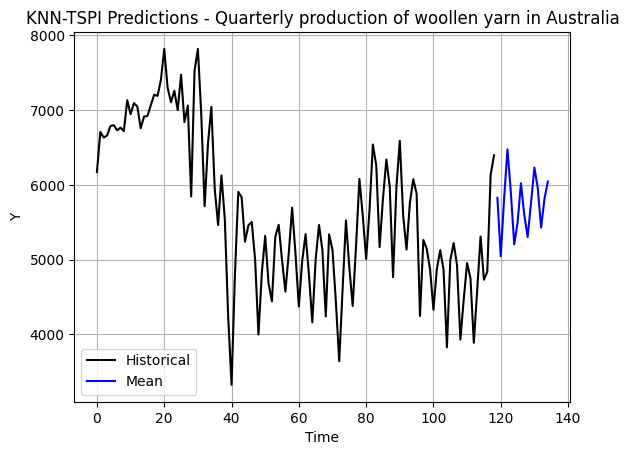

In [12]:
rng = range(len(data), len(data) + h)
plt.title("KNN-TSPI Predictions - Quarterly production of woollen yarn in Australia")
plt.plot(data, color="black", label="Historical")
plt.plot(rng, y["mean"], color="blue", label="Mean")
plt.grid()
plt.xlabel("Time")
plt.ylabel("Y")
plt.legend(loc="lower left")
plt.show()